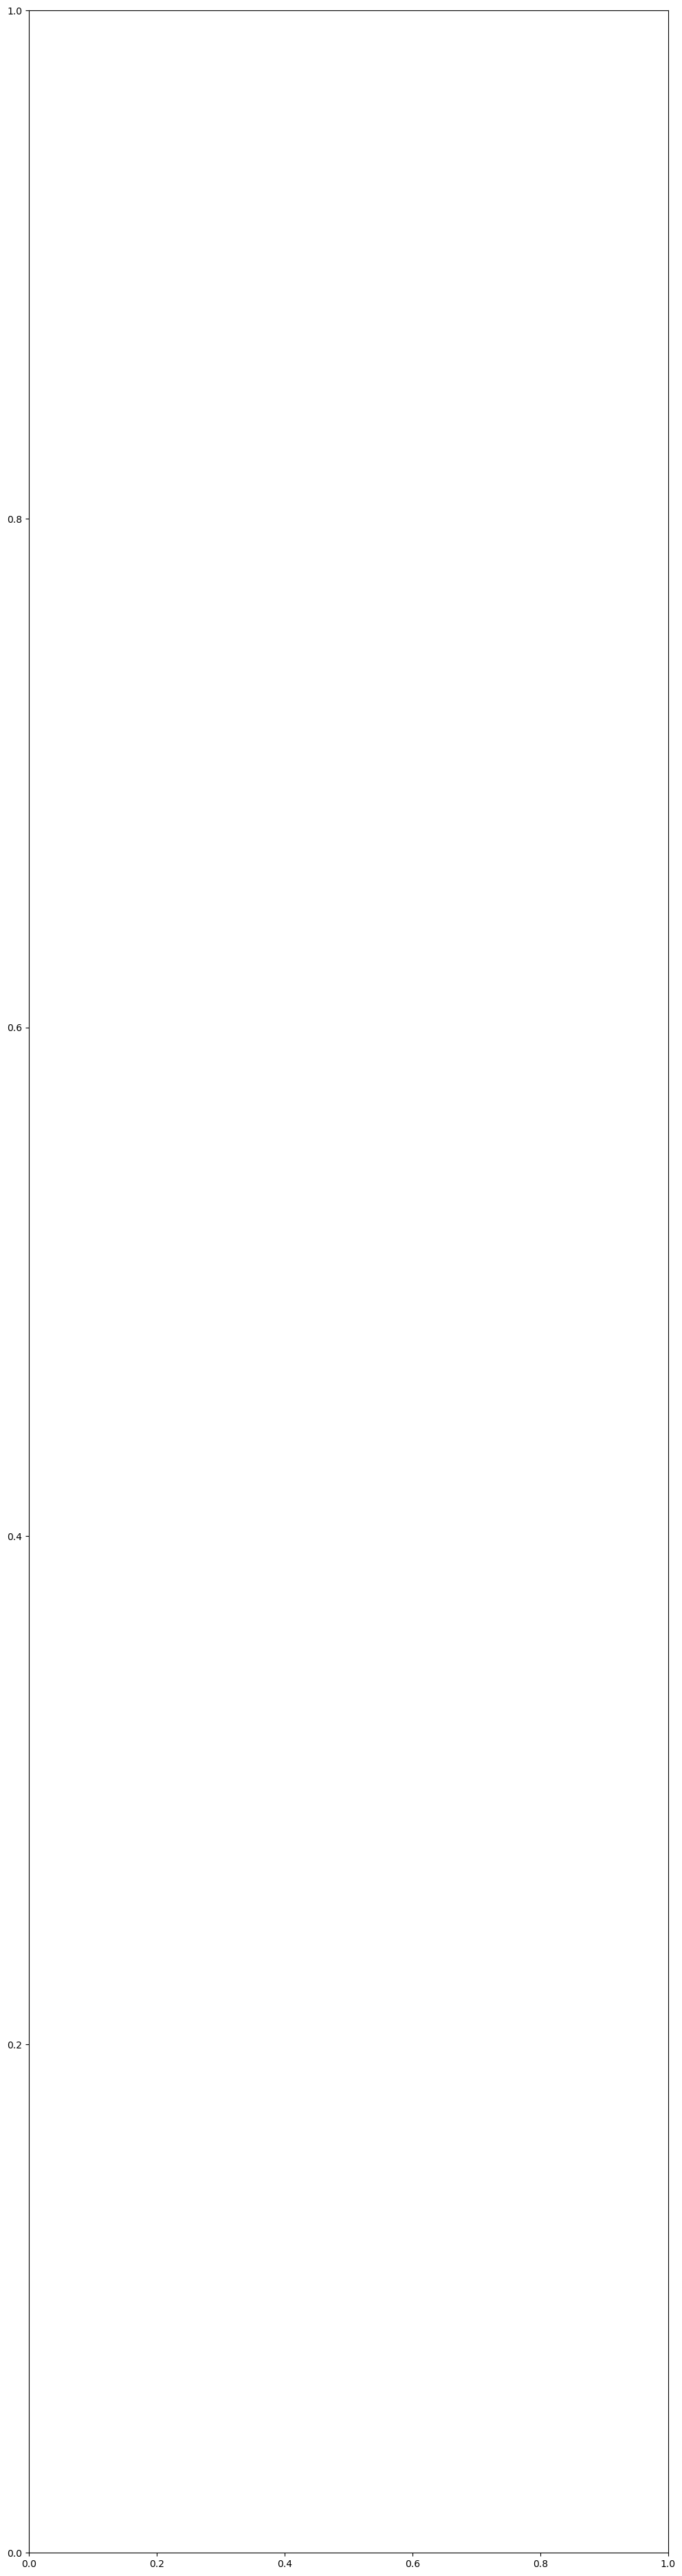

In [31]:
import matplotlib.pyplot as plt
import numpy as np

np.array(capitalOs)

fig, ax = plt.subplots(figsize=(10,10))

matrix = np.array([["O", "O"], ["O", "O"]])

matrix = np.full((10, 10), "O")

large_matrix = np.full((39, 10), " ")

for i in range(10):
    large_matrix[i * 4, :]=  matrix[i, :]

# Add 'O's to the plot
for (i, j), val in np.ndenumerate(large_matrix):
    if val == "O":
        ax.text(j, i, val, ha='center', va='center', fontsize=700, color='black')
    
fig, ax = plt.subplots(figsize=(12, 48))

plt.show()

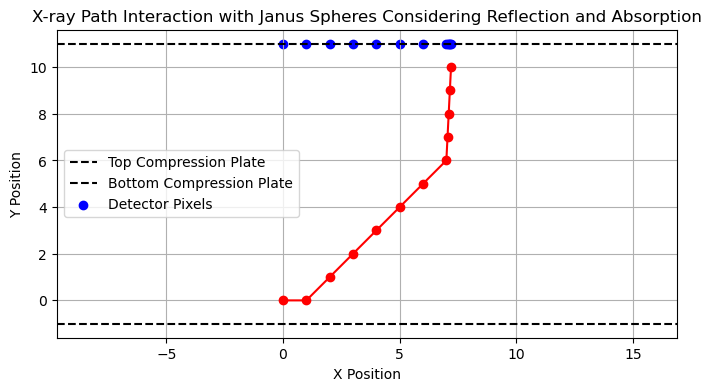

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

"""
Figure 4: Single Janus Sphere with X-ray Reflection at Bragg Angle

This figure illustrates a single Janus sphere with an x-ray bouncing off the middle of the flat mirror
between the hemispheres at the Bragg angle. The Janus sphere has dual-faced properties: one side is reflective,
and the other is absorptive. The x-ray interaction is shown with precise details, including the scale bar indicating
the spacing of Janus spheres and detector pixels, both set at 0.1 mm. This figure is designed to visually demonstrate
the concept of x-ray path manipulation using Janus spheres, as discussed in the chapter on advanced medical imaging technologies.

Author: Syed Hussain Ather
Date:  5/29/2024
"""

def draw_single_janus_sphere():
    fig, ax = plt.subplots()
    # Drawing the sphere
    sphere_radius = 0.4
    circle = patches.Circle((0.5, 0.5), sphere_radius, edgecolor='black', facecolor='none', linewidth=2)
    ax.add_patch(circle)
    
    # Highlighting the dual-faced nature
    half_circle = patches.Wedge(center=(0.5, 0.5), r=sphere_radius, theta1=180, theta2=360, edgecolor='black', facecolor='grey')
    ax.add_patch(half_circle)

    # X-ray incoming path
    x_ray_incoming = np.array([[0.1, 0.5], [0.5, 0.5]])
    ax.plot(x_ray_incoming[:, 0], x_ray_incoming[:, 1], 'b-', label='Incoming X-ray')
    
    # X-ray reflected path at Bragg angle
    bragg_angle = 10  # example Bragg angle in degrees
    x_ray_reflected = np.array([[0.5, 0.5], [0.5 + sphere_radius * np.cos(np.radians(bragg_angle)), 0.5 + sphere_radius * np.sin(np.radians(bragg_angle))]])
    ax.plot(x_ray_reflected[:, 0], x_ray_reflected[:, 1], 'r-', label='Reflected X-ray')
    
    # Adding mechanism for electronic steering
    ax.plot([0.1, 0.9], [0.5, 0.5], color='red', linestyle='--')
    ax.text(0.5, 0.6, 'Electronic Steering Axis', color='red', ha='center')
    
    # Adding a scale bar
    scalebar_length = 0.1  # length for the scale bar in mm
    ax.plot([0.8, 0.8 + scalebar_length], [0.2, 0.2], color='black', lw=2)
    ax.text(0.8 + scalebar_length / 2, 0.22, '0.1 mm', ha='center')

    ax.set_aspect('equal', 'box')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.title('Single Janus Sphere with X-ray Reflection at Bragg Angle\n(Sphere Spacing: 0.1 mm)')
    plt.legend()
    plt.show()

draw_single_janus_sphere()


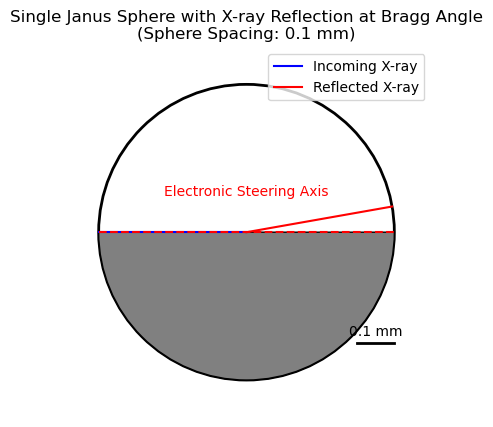

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

"""
Figure 4: Single Janus Sphere with X-ray Reflection at Bragg Angle

This figure illustrates a single Janus sphere with an x-ray bouncing off the middle of the flat mirror
between the hemispheres at the Bragg angle. The Janus sphere has dual-faced properties: one side is reflective,
and the other is absorptive. The x-ray interaction is shown with precise details, including the scale bar indicating
the spacing of Janus spheres and detector pixels, both set at 0.1 mm. This figure is designed to visually demonstrate
the concept of x-ray path manipulation using Janus spheres, as discussed in the chapter on advanced medical imaging technologies.

Author: Syed Hussain Ather
Date:  5/29/2024
"""

def draw_single_janus_sphere():
    fig, ax = plt.subplots()
    # Drawing the sphere
    sphere_radius = 0.4
    circle = patches.Circle((0.5, 0.5), sphere_radius, edgecolor='black', facecolor='none', linewidth=2)
    ax.add_patch(circle)
    
    # Highlighting the dual-faced nature
    half_circle = patches.Wedge(center=(0.5, 0.5), r=sphere_radius, theta1=180, theta2=360, edgecolor='black', facecolor='grey')
    ax.add_patch(half_circle)

    # X-ray incoming path
    x_ray_incoming = np.array([[0.1, 0.5], [0.5, 0.5]])
    ax.plot(x_ray_incoming[:, 0], x_ray_incoming[:, 1], 'b-', label='Incoming X-ray')
    
    # X-ray reflected path at Bragg angle
    bragg_angle = 10  # example Bragg angle in degrees
    x_ray_reflected = np.array([[0.5, 0.5], [0.5 + sphere_radius * np.cos(np.radians(bragg_angle)), 0.5 + sphere_radius * np.sin(np.radians(bragg_angle))]])
    ax.plot(x_ray_reflected[:, 0], x_ray_reflected[:, 1], 'r-', label='Reflected X-ray')
    
    # Adding mechanism for electronic steering
    ax.plot([0.1, 0.9], [0.5, 0.5], color='red', linestyle='--')
    ax.text(0.5, 0.6, 'Electronic Steering Axis', color='red', ha='center')
    
    # Adding a scale bar
    scalebar_length = 0.1  # length for the scale bar in mm
    ax.plot([0.8, 0.8 + scalebar_length], [0.2, 0.2], color='black', lw=2)
    ax.text(0.8 + scalebar_length / 2, 0.22, '0.1 mm', ha='center')

    ax.set_aspect('equal', 'box')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.title('Single Janus Sphere with X-ray Reflection at Bragg Angle\n(Sphere Spacing: 0.1 mm)')
    plt.legend()
    plt.show()

draw_single_janus_sphere()


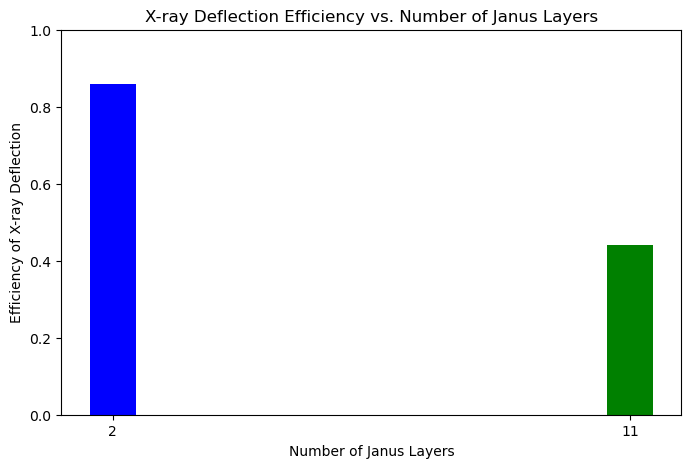

In [7]:
import matplotlib.pyplot as plt

# Author: Syed Ather
# Date: 2024-06-01
# Description: This script generates a bar chart that visualizes the deflection efficiency of X-rays using 2 and 11 Janus layers.

# Data preparation: defining the number of Janus layers and their corresponding efficiencies.
layers = [2, 11]  # Number of Janus layers tested
efficiencies = [0.86, 0.44]  # Corresponding deflection efficiencies

# Plotting setup: creating a bar chart with specific formatting.
plt.figure(figsize=(8, 5))  # Sets the size of the figure
plt.bar(layers, efficiencies, color=['blue', 'green'])  # Creates a bar chart with colors specified for each bar
plt.xlabel('Number of Janus Layers')  # Label for the x-axis
plt.ylabel('Efficiency of X-ray Deflection')  # Label for the y-axis
plt.title('X-ray Deflection Efficiency vs. Number of Janus Layers')  # Title of the plot
plt.xticks(layers)  # Ensures that only the specified layer numbers are used as x-axis ticks
plt.ylim(0, 1)  # Set the y-axis limits to show range from 0 to 1 for clarity
plt.show()  # Displays the plot


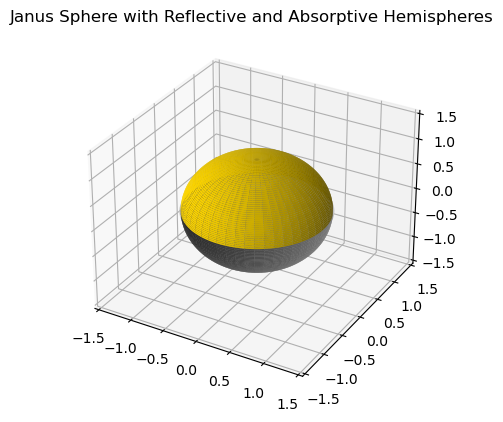

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_hemisphere(ax, center, radius, direction, color, shift):
    # Make data for a hemisphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi / 2, 50)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    # Adjust z-coordinate based on hemisphere direction and include spacing
    if direction == 'negative':
        z = center[2] - radius * np.outer(np.ones(np.size(u)), np.cos(v)) - shift
    else:
        z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v)) + shift
    
    ax.plot_surface(x, y, z, color=color, linewidth=0, antialiased=True)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])

# Center and radius of the Janus sphere
center = [0, 0, 0]
radius = 1
spacing = 0.1 / 1000  # Convert 0.1 mm to the units used in the plot (if necessary)

# Plotting two hemispheres with a spacing of 0.1 mm
plot_hemisphere(ax, center, radius, 'positive', 'gold', spacing / 2)  # Reflective
plot_hemisphere(ax, center, radius, 'negative', 'grey', spacing / 2)  # Absorptive

# Mirror between the hemispheres, represented as a thin disc
theta = np.linspace(0, 2 * np.pi, 100)
x = radius * np.cos(theta)
y = radius * np.sin(theta)
z = np.full_like(theta, center[2])  # Place the mirror at the sphere's center plane
ax.plot(x, y, z, color='silver', linewidth=2)

ax.set_title('Janus Sphere with Reflective and Absorptive Hemispheres')
plt.show()
